<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/Basic_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-09-15 08:12:12--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  27.3MB/s    in 8.3s    

2020-09-15 08:12:25 (22.8 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [3]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [4]:
!ls

ml-20m	ml-20m.zip  sample_data


In [7]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [13]:
len(np.unique(pd.Categorical(df['userId']).codes))

138493

In [14]:
len(pd.Categorical(df['userId']).codes)

20000263

In [15]:
df['new_user_id'] = pd.Categorical(df['userId']).codes

In [19]:
len(np.unique(pd.Categorical(df['movieId']).codes))

26744

In [20]:
len(pd.Categorical(df['userId']).codes)

20000263

In [21]:
df['new_movie_id'] = pd.Categorical(df['movieId']).codes

In [22]:
df.head()

,userId,movieId,rating,timestamp,new_user_id,new_movie_id
0,1,2,3.5,1112486027,0,1
1,1,29,3.5,1112484676,0,28
2,1,32,3.5,1112484819,0,31
3,1,47,3.5,1112484727,0,46
4,1,50,3.5,1112484580,0,49


In [23]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [24]:
N = len(set(user_ids))
M = len(set(movie_ids))
K = 10

# N is number of users
# M is number of movies
# K is number of embeddings

In [25]:
u = Input(shape=(1,))
m = Input(shape=(1,))
u_emb = Embedding(N, K)(u) # output is (num_samples, 1-T, K)
m_emb = Embedding(M, K)(m) # output is (num_samples, 1-T, K)


u_emb = Flatten()(u_emb) # now it's (num_samples, K)
m_emb = Flatten()(m_emb) # now it's (num_samples, K)


x = Concatenate()([u_emb, m_emb]) # now it's (num_samples, 2K)


x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)

In [26]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  optimizer=SGD(lr=0.08, momentum=0.9),
)

In [27]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]


avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [28]:
r = model.fit(
  x=[train_user, train_movie],
  y=train_ratings,
  epochs=30,
  batch_size=1024,
  validation_data=([test_user, test_movie], test_ratings),
)

Epoch 1/30
15626/15626 [==============================] - 90s 6ms/step - loss: 0.7769 - val_loss: 0.7316
Epoch 2/30
15626/15626 [==============================] - 88s 6ms/step - loss: 0.7009 - val_loss: 0.6967
Epoch 3/30
15626/15626 [==============================] - 88s 6ms/step - loss: 0.6781 - val_loss: 0.6823
Epoch 4/30
15626/15626 [==============================] - 90s 6ms/step - loss: 0.6628 - val_loss: 0.6764
Epoch 5/30
15626/15626 [==============================] - 89s 6ms/step - loss: 0.6523 - val_loss: 0.6682
Epoch 6/30
15626/15626 [==============================] - 88s 6ms/step - loss: 0.6400 - val_loss: 0.6621
Epoch 7/30
15626/15626 [==============================] - 89s 6ms/step - loss: 0.6246 - val_loss: 0.6540
Epoch 8/30
15626/15626 [==============================] - 88s 6ms/step - loss: 0.6100 - val_loss: 0.6442
Epoch 9/30
15626/15626 [==============================] - 86s 6ms/step - loss: 0.5994 - val_loss: 0.6426
Epoch 10/30
15626/15626 [==============================

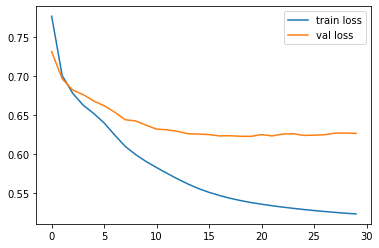

In [29]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()